[(100.0, 155.0), (500.0, 846.0), (900.0, 155.0)]


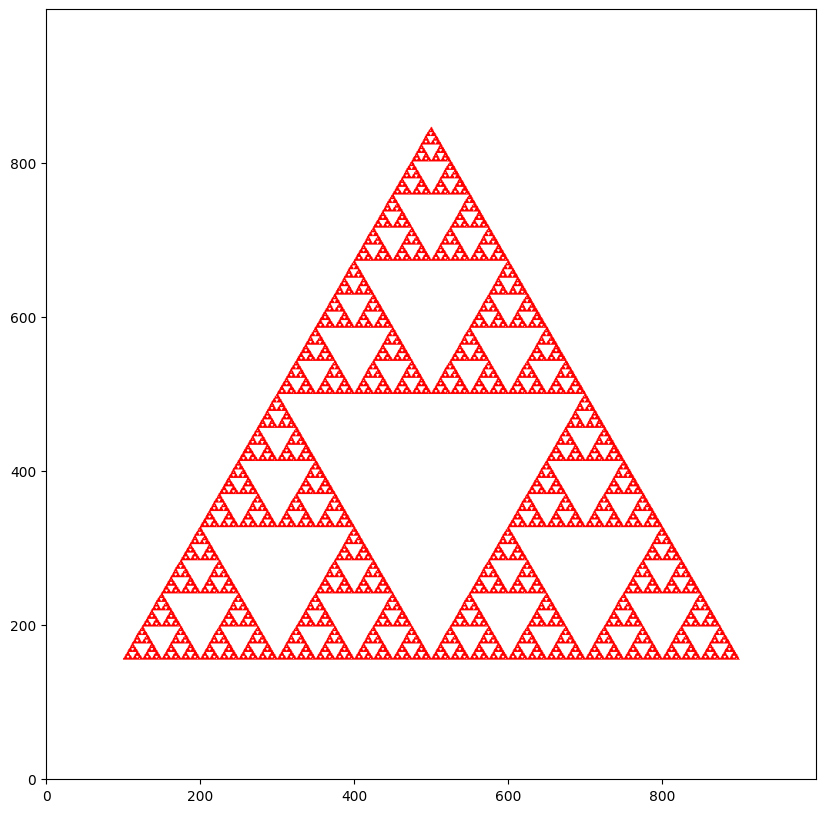

In [ ]:
import math as m
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

def GetTriangle(shape, side):
  h = side * m.sqrt(3) // 2
  centre = np.floor_divide(shape, 2)
  alligned_centre = np.subtract(centre, (0, h // 6))
  a = tuple(np.subtract(alligned_centre, (side // 2, h // 3)))
  b = tuple(np.add(alligned_centre, (0, side * m.sqrt(3) // 3)))
  c = tuple(np.subtract(alligned_centre, (-side // 2, h // 3)))
  return [a, b, c]

def sierp(img, n, a, b, c):
  if n == 0:
    return 0
  img.line([a, b], fill=(255, 0, 0))
  img.line([b, c], fill=(255, 0, 0))
  img.line([a, c], fill=(255, 0, 0))
  return sierp(img, n-1, a, tuple(np.add(a,b)//2), tuple(np.add(a,c)//2)) + sierp(img, n-1, tuple(np.add(a,b)//2), b, tuple(np.add(b,c)//2)) + sierp(img, n-1, tuple(np.add(a,c)//2), tuple(np.add(b,c)//2), c)

shape = (1000, 1000)
color = (255,255,255)
side = 800
triangle = GetTriangle(shape, side)
print(triangle)
n = 10

im = Image.new('RGB', shape, color)
draw = ImageDraw.Draw(im)
sierp(draw, n, triangle[0], triangle[1], triangle[2])

fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(im)
plt.gca().invert_yaxis()
plt.show()

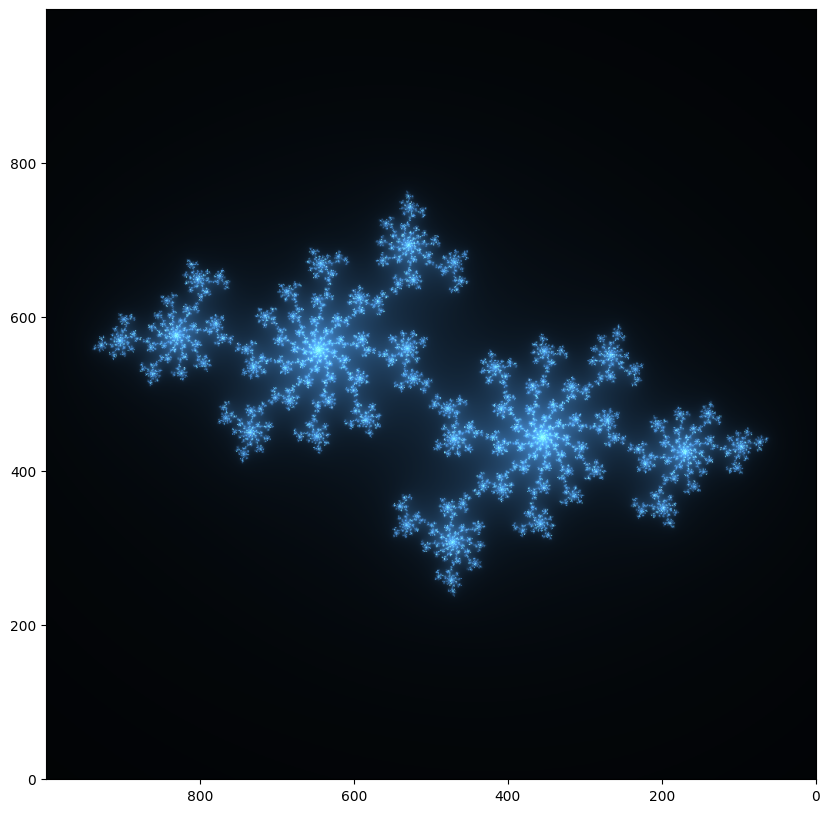

In [ ]:
import math as m
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

R = 1.7
shape = (1000, 1000)
color = (255,255,255)
side = 800
n = 2
max_iter = 1000
cx = -0.70176
cy = -0.3842
c = complex(cx, cy)

img = Image.new('RGB', shape, color)

for x in range(shape[0]):
  for y in range(shape[1]):
    zx = ((x / shape[0]) * 2 * R) - R
    zy = ((y / shape[1]) * 2 * R) - R
    z = complex(zx, zy)
    iter = 0
    while ((abs(z) < R ** 2) and (iter < max_iter)):
      z = z ** n + c
      iter += 1
    if iter == max_iter:
      img.putpixel((x,y), (0,0,0))
    else:
      color = round((iter + 1 - (m.log(m.log(abs(z))) / m.log(n))) * 8)
      img.putpixel((x,y), (round(color * 0.2), round(color * 0.4), round(color * 0.6)))

fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

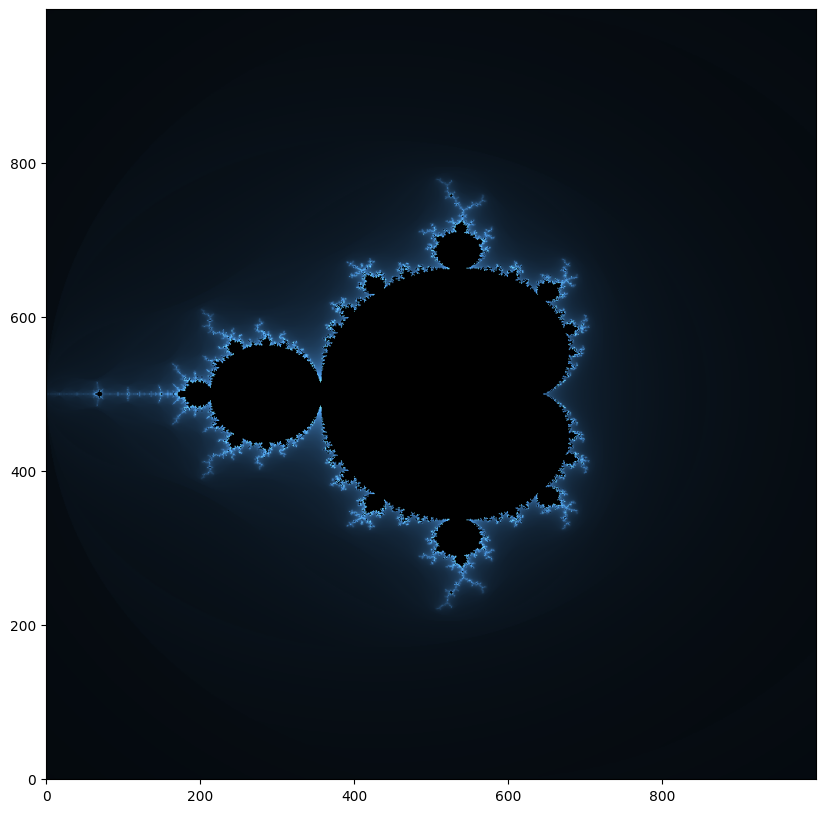

In [ ]:
import math as m
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt


xrange = np.linspace(-2,1.5,1000)
yrange = np.linspace(-2,2,1000)
max_iter = 50
shape = (1000, 1000)
color = (255,255,255)

img = Image.new('RGB', shape, color)

for i in range(len(xrange)):
  for j in range(len(yrange)):
    x = xrange[i]
    y = yrange[j]
    c = complex(x,y)
    z = 0
    for iter in range(max_iter):
      if(abs(z) >= 2):
        color = round((iter + 1 - (m.log(m.log(abs(z))) / m.log(2))) * 12)
        img.putpixel((i,j), (round(color * 0.2), round(color * 0.4), round(color * 0.6)))
        break
      else: z = z**2 + c
    else:
      img.putpixel((i,j), (0,0,0))

fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img)
plt.gca().invert_yaxis()
plt.show()

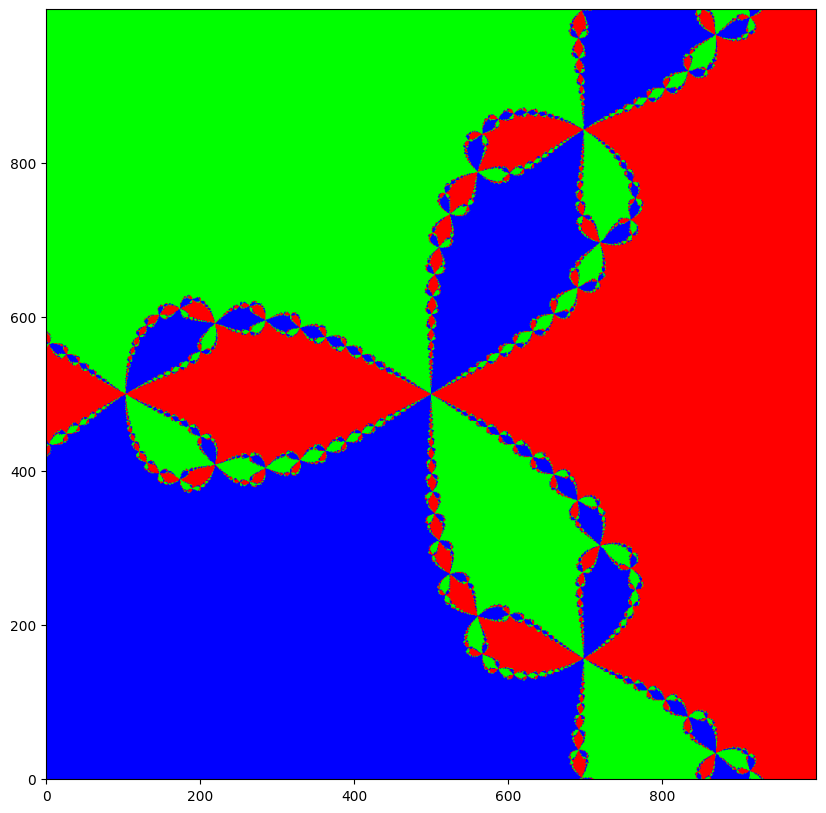

In [ ]:
import math as m
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

def newton(z0, max_iter=1000, tolerance=0.000001):
  z = z0
  for i in range(max_iter):
    dz = ((z ** 3) - 1) / (3 * (z ** 2))
    if abs(dz) < tolerance:
      return z
    z -= dz
  return False

xrange = np.linspace(-1,1,1000)
yrange = np.linspace(-1,1,1000)
max_iter = 30
shape = (1000, 1000)
color = (255,255,255)
roots = [complex(1, 0), complex(-0.5, m.sqrt(3)/2), complex(-0.5, -m.sqrt(3)/2)]
colors = [(255,0,0), (0,255,0), (0,0,255)]
tolerance = 0.000001

img = Image.new('RGB', shape, color)

for i in range(len(xrange)):
  for j in range(len(yrange)):
    x = xrange[i]
    y = yrange[j]
    z = complex(x,y)
    res = newton(z)
    if res is not False:
      index = np.where(np.isclose(roots, res, atol=tolerance))[0][0]
      img.putpixel((i,j), colors[index])

fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img)
plt.gca().invert_yaxis()
plt.show()